# Jupyter Notebook for R
This is the environment I am going to use to create the different plots.

## Graph 1
![title](images/Graph_01.jpg)

In [1]:
# Import the data and look at the first six rows
indivData <- read.csv(file = 'data/Attempts_records.csv')
# head(indivData)

In [2]:
# Transform the data
# Participant 1
levels(indivData$Participant.1)[levels(indivData$Participant.1)=="NBNF"] <- 1
levels(indivData$Participant.1)[levels(indivData$Participant.1)=="B"] <- 0
levels(indivData$Participant.1)[levels(indivData$Participant.1)=="F"] <- 0
# Participant 2
levels(indivData$Participant.2)[levels(indivData$Participant.2)=="NBNF"] <- 1
levels(indivData$Participant.2)[levels(indivData$Participant.2)=="B"] <- 0
levels(indivData$Participant.2)[levels(indivData$Participant.2)=="F"] <- 0
# Participant 3
levels(indivData$Participant.3)[levels(indivData$Participant.3)=="NBNF"] <- 1
levels(indivData$Participant.3)[levels(indivData$Participant.3)=="B"] <- 0
levels(indivData$Participant.3)[levels(indivData$Participant.3)=="F"] <- 0
# Participant 4
levels(indivData$Participant.4)[levels(indivData$Participant.4)=="NBNF"] <- 1
levels(indivData$Participant.4)[levels(indivData$Participant.4)=="B"] <- 0
levels(indivData$Participant.4)[levels(indivData$Participant.4)=="F"] <- 0
# Participant 5
levels(indivData$Participant.5)[levels(indivData$Participant.5)=="NBNF"] <- 1
levels(indivData$Participant.5)[levels(indivData$Participant.5)=="B"] <- 0
levels(indivData$Participant.5)[levels(indivData$Participant.5)=="F"] <- 0
# TODO this can be converted to a loop and it would not require to add new lines for new participants

In [3]:
# Selecting each of the subset of data
v_normal <- indivData[c(3:17),c(2:6)]
v_strong <- indivData[c(19:33),c(2:6)]
v_weak <- indivData[c(35:49),c(2:6)]
# v_normal
# v_strong
# v_weak
vh_normal <- indivData[c(52:66),c(2:6)]
vh_strong <- indivData[c(68:82),c(2:6)]
vh_weak <- indivData[c(84:98),c(2:6)]
# vh_normal
# vh_strong
# vh_weak
h_normal <- indivData[c(101:115),c(2:6)]
h_strong <- indivData[c(117:131),c(2:6)]
h_weak <- indivData[c(133:147),c(2:6)]
# h_normal
# h_strong
# h_weak

In [4]:
# Sum the positive cases for V in a new vector called df_t1
df_t1 <- matrix(, 3, ncol(v_normal))
# TASK 1
num <- 1
for(i in names(v_normal)){
    df_t1[1,num] <- sum(as.numeric(as.character(v_normal[[i]])))
    num <- num + 1
}
# TASK 2
num <- 1
for(i in names(v_strong)){
    df_t1[2,num] <- sum(as.numeric(as.character(v_strong[[i]])))
    num <- num + 1
}
# TASK 3
num <- 1
for(i in names(v_weak)){
    df_t1[3,num] <- sum(as.numeric(as.character(v_weak[[i]])))
    num <- num + 1
}
# df_t1

In [5]:
# Sum the positive cases for V+H in a new vector called df_t2
df_t2 <- matrix(, 3, ncol(vh_normal))
# TASK 1
num <- 1
for(i in names(vh_normal)){
    df_t2[1,num] <- sum(as.numeric(as.character(vh_normal[[i]])))
    num <- num + 1
}
# TASK 2
num <- 1
for(i in names(vh_strong)){
    df_t2[2,num] <- sum(as.numeric(as.character(vh_strong[[i]])))
    num <- num + 1
}
# TASK 3
num <- 1
for(i in names(vh_weak)){
    df_t2[3,num] <- sum(as.numeric(as.character(vh_weak[[i]])))
    num <- num + 1
}
# df_t2

15,15,15,15,15
12,12,12,12,12
15,15,15,15,15


In [15]:
# Sum the positive cases for H in a new vector called df_t3
df_t3 <- matrix(, 3, ncol(h_normal))
# TASK 1
num <- 1
for(i in names(h_normal)){
    df_t3[1,num] <- sum(as.numeric(as.character(h_normal[[i]])))
    num <- num + 1
}
# TASK 2
num <- 1
for(i in names(h_strong)){
    df_t3[2,num] <- sum(as.numeric(as.character(h_strong[[i]])))
    num <- num + 1
}
# TASK 3
num <- 1
for(i in names(h_weak)){
    df_t3[3,num] <- sum(as.numeric(as.character(h_weak[[i]])))
    num <- num + 1
}
# df_t3

15,15,15,15,15
14,14,14,14,14
15,15,15,15,15


In [17]:
df <- c(rowMeans(df_t1), rowMeans(df_t2),rowMeans(df_t3))
std <- c(sd(df_t1), sd(df_t2),sd(df_t3))
std

[1] 0.00000 1.46385 0.48795

In [12]:
# First time I needed to use the library, I had to load it
 library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


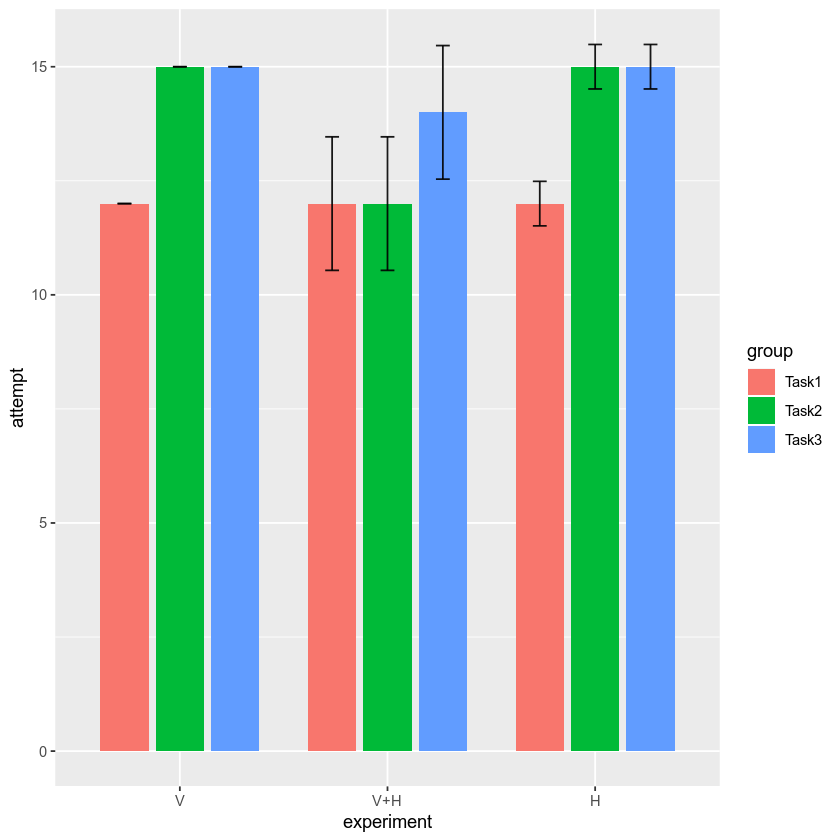

In [34]:
survey <- data.frame(group=rep(c("Task1", "Task2", "Task3"),each=3),
                     experiment=rep(c("V", "V+H", "H"),3),
                     attempt=df,
                     sd=std)
survey$experiment = factor(survey$experiment, levels = c("V", "V+H", "H"), ordered = TRUE)

ggplot(survey, aes(x=experiment, y=attempt, fill=group)) + 
  geom_bar(stat="identity", width=0.7, position=position_dodge(width=0.8)) +
  geom_errorbar( aes(x=experiment, ymin=attempt-sd, ymax=attempt+sd), width=0.2, alpha=0.9, position=position_dodge(.8))

## Graph 2
![title](images/Graph_02.jpg)

In [ ]:
# find all the files whose names ending with ‘xlsx’ or ‘csv’ and store the file location information 
# into ‘files’ variable.
files <- list.files(path = "data/01", pattern = "*.csv", full.names = T)
files

In [ ]:
# Read the files one by one and bind them together.
tbl <- sapply(files, read_csv, simplify=FALSE) %>% 
bind_rows(.id = "id")

## Graph 3
![title](images/Graph_03.jpg)